In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [2]:
data = pd.read_excel("/content/FRP Data.xlsx")

In [3]:
data.head()

,Converted_Strength_(Mpa),Total_Thickness_of_FRP_(mm),Ef_(Mpa),2a_(mm),2b_(mm),H_(mm),Ag_(mm2),fcc(Mpa)
0,72.4,0.501,210000,250.0,250.0,500,49107.142857,105.848145
1,72.4,0.501,210000,250.0,192.0,500,37714.285714,87.517765
2,72.4,0.501,210000,250.0,147.0,500,28875.000000,79.880866
3,72.4,0.501,210000,250.0,125.0,500,24553.571429,73.929367
4,72.4,1.770,72000,250.0,250.0,500,49107.142857,107.527942


In [4]:
data.isnull().sum()

Converted_Strength_(Mpa)       0
Total_Thickness_of_FRP_(mm)    0
Ef_(Mpa)                       0
2a_(mm)                        0
2b_(mm)                        0
H_(mm)                         0
Ag_(mm2)                       0
fcc(Mpa)                       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Converted_Strength_(Mpa)     130 non-null    float64
 1   Total_Thickness_of_FRP_(mm)  130 non-null    float64
 2   Ef_(Mpa)                     130 non-null    int64  
 3   2a_(mm)                      130 non-null    float64
 4   2b_(mm)                      130 non-null    float64
 5   H_(mm)                       130 non-null    int64  
 6   Ag_(mm2)                     130 non-null    float64
 7   fcc(Mpa)                     130 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 8.2 KB


*  There are no null values
*  There are 8 columns - 6 float, and 2 integer



In [76]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Converted_Strength_(Mpa),130.0,50.169231,16.324817,24.500000,35.800000,50.000000,72.400000,75.700000
Total_Thickness_of_FRP_(mm),130.0,1.642308,1.305446,0.171000,0.342000,1.770000,2.478000,4.850000
Ef_(Mpa),130.0,155169.230769,101359.375871,72000.000000,72000.000000,72000.000000,290000.000000,290000.000000
2a_(mm),130.0,254.693077,39.740141,200.000000,200.000000,250.000000,295.900000,305.000000
2b_(mm),130.0,173.001538,60.424307,80.000000,125.000000,151.150000,199.000000,305.000000
H_(mm),130.0,525.307692,116.475625,400.000000,400.000000,500.000000,600.000000,915.000000
Ag_(mm2),130.0,35353.395242,15516.587753,12571.428571,24553.571429,31428.571429,45568.600000,73091.071429
fcc(Mpa),130.0,68.927783,27.915061,25.195741,51.473648,62.601076,87.517765,173.396567


The target variable is fcc(Mpa)
* it ranges from 27.91 to 173.39
* there is a little variation in the mean and median of this column

<ipython-input-7-396e6dff3ce8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['fcc(Mpa)'])


<Axes: xlabel='fcc(Mpa)', ylabel='Density'>

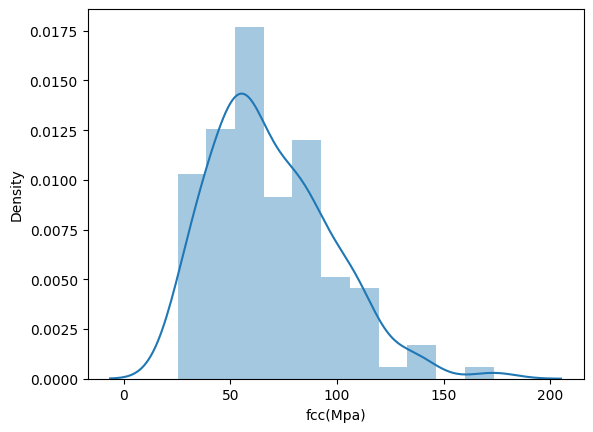

In [7]:
sns.distplot(data['fcc(Mpa)'])

Observations:
* It has positive skewness
* little deviated from normal distribution
* It is showing peakedness (unimodel)

In [8]:
#skewness and kurtosis
print("Skewness: %f" % data['fcc(Mpa)'].skew())
print("Kurtosis: %f" % data['fcc(Mpa)'].kurt())

Skewness: 0.796744
Kurtosis: 0.691067


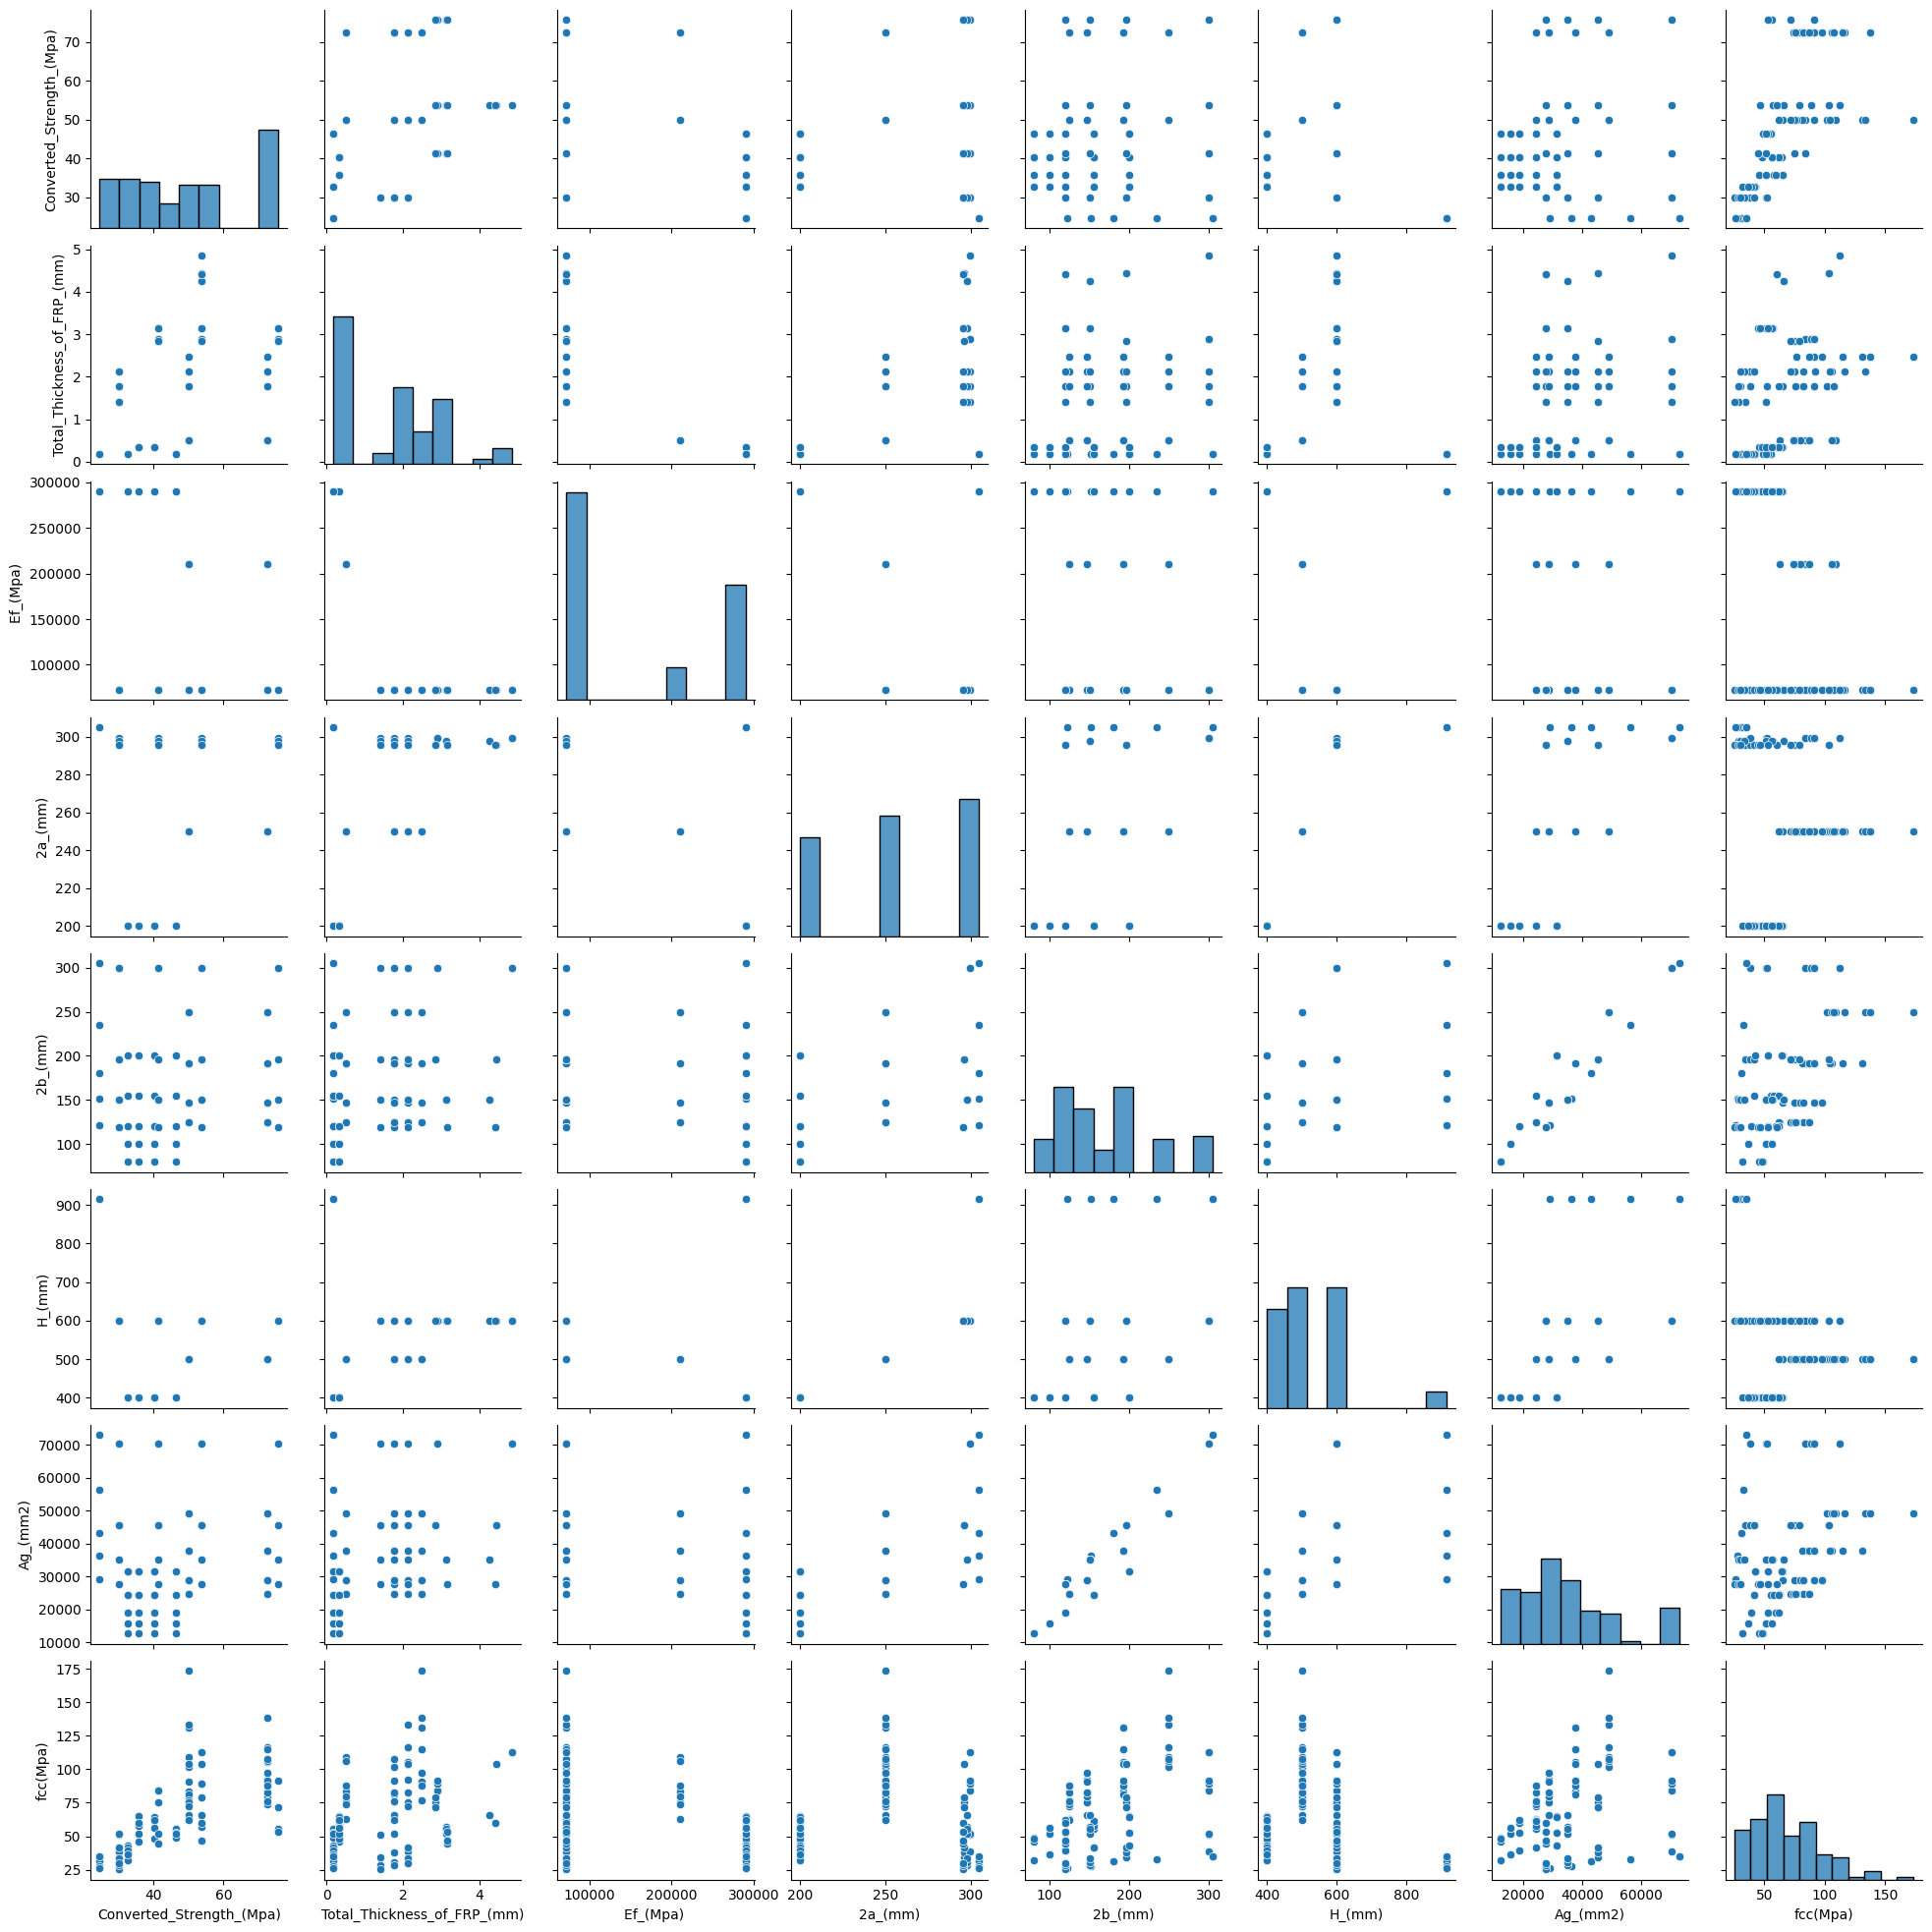

In [9]:
sns.pairplot(data = data)




```
# This is formatted as code
```

2b_mm and ag_(mm2) are linearly related

<Axes: >

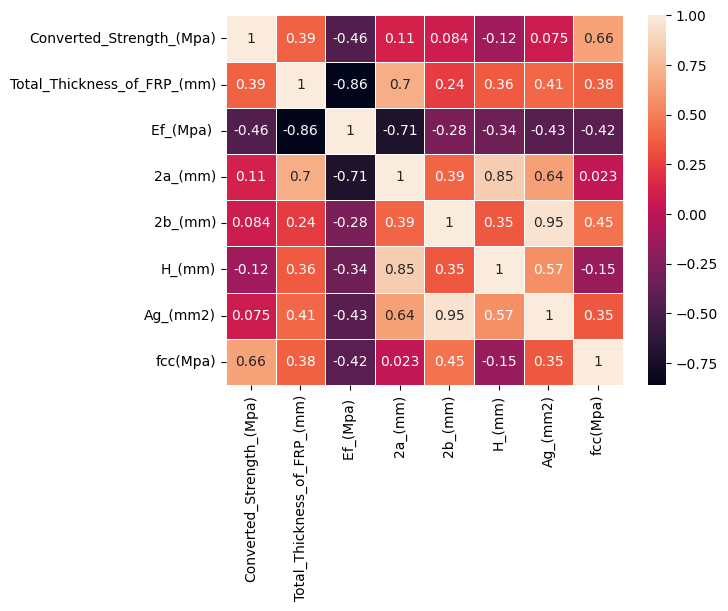

In [10]:
sns.heatmap(data.corr(), annot=True, linewidths=0.5)

:converted_strength and 2b_mm are related with target column and H_mm is least related with target

Converted strength and 2b mm are highly related with target variable

In [ ]:
data.columns

Index(['Converted_Strength_(Mpa)', 'Total_Thickness_of_FRP_(mm)', 'Ef_(Mpa) ',
       '2a_(mm)', '2b_(mm)', 'H_(mm)', 'Ag_(mm2)', 'fcc(Mpa)'],
      dtype='object')

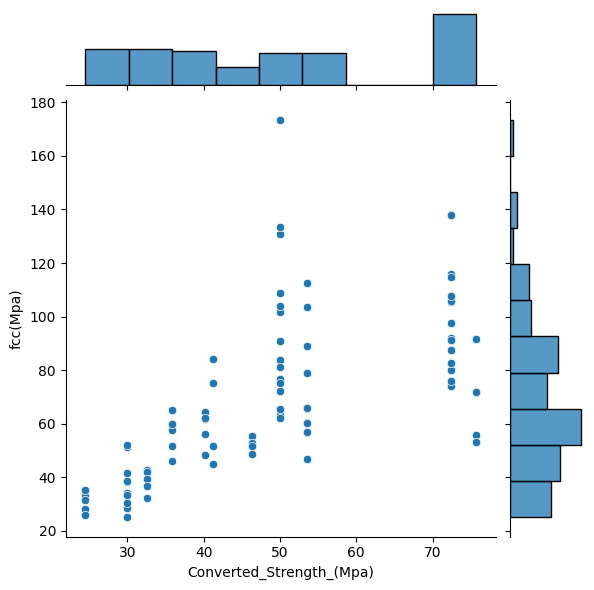

In [11]:
sns.jointplot(x='Converted_Strength_(Mpa)', y='fcc(Mpa)', data = data)


#Building data and train-test-split

In [77]:
X = data.drop(["fcc(Mpa)"],axis =1)
y = data["fcc(Mpa)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [79]:
print(f'Total # of sample in whole dataset: {len(X)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(X_test)}')
print(f'Shape of X_test: {X_test.shape}')

Total # of sample in whole dataset: 130
**************************************************
Total # of sample in train dataset: 97
Shape of X_train: (97, 7)
**************************************************
Total # of sample in test dataset: 33
Shape of X_test: (33, 7)


In [80]:
#Normalization of the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##Multiple Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = True)
model.fit(X_train, y_train)
train_pred =  model.predict(X_train)
pred = model.predict(X_test)
 
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 77.31410223217998
Test score of trained model: 69.56912051503176


In [82]:
def drawThePlot(model, y_train, train_pred, y_test, pred, title):
  train_res = pd.DataFrame({'Data'  : ['Train' for i in range(len(y_train))],
      'actual' : y_train,
      'pred' :train_pred})
  test_res = pd.DataFrame({'Data'  : ['Test' for i in range(len(y_test))],
      'actual' : y_test,
      'pred' : pred})
  results = pd.concat([train_res, test_res], axis=0)

  ax = sns.lmplot(x="actual", y="pred", hue="Data", data=results, legend_out=False)
  ax.set(title=title)
  plt.xlabel( "fcc' (MPa)" , size = 10 )
  plt.ylabel( "Predicted fcc' (MPa)" , size = 10 )
  plt.legend(loc='lower right')
  plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


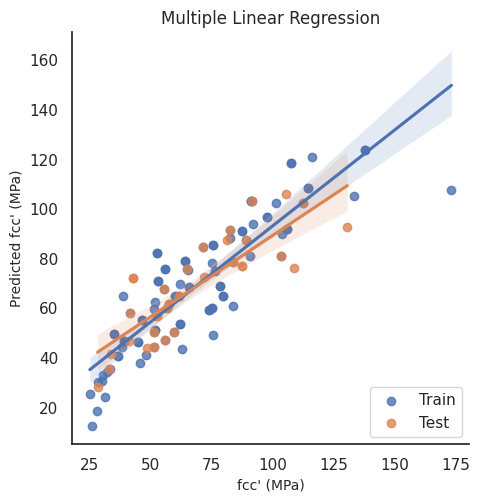

In [83]:
sns.set_theme(style="white")
drawThePlot(model, y_train, train_pred, y_test, pred, "Multiple Linear Regression")

In [85]:
print('Linear Model Coefficient (m): ', model.coef_)
print('Linear Model Coefficient (b): ', model.intercept_)

Linear Model Coefficient (m):  [ 11.8102213    9.58788793 -11.94905937 -25.43941727  32.35086205
  12.5177068  -21.15515361]
Linear Model Coefficient (b):  69.26028651177872


In [86]:
#Evaluation of the model

k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,196.520712
1,RMSE,14.018585
2,MAE,10.160602
3,MAPE,15.794867
4,r2,0.695691
5,adj_r2,0.610485


##Random Sample Consensus

In [90]:
from sklearn.linear_model import RANSACRegressor


model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
pred = model.predict(X_test)
 
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: -752.69598769955
Test score of trained model: -537.9233554880383


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ransac.py:343: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.1 and will be removed in 1.3.
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


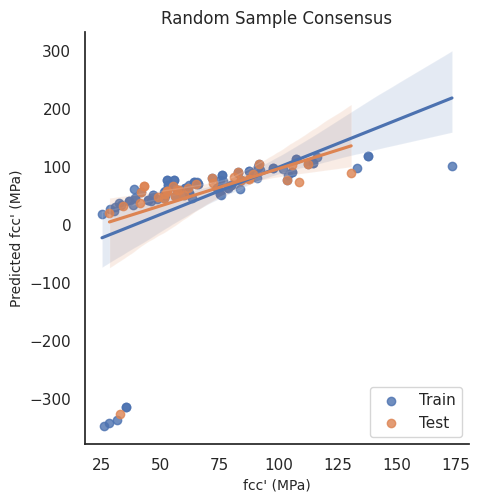

In [91]:
sns.set_theme(style="white")
drawThePlot(model, y_train, train_pred, y_test, pred, "Random Sample Consensus")

In [92]:
#Evaluation of the model

k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,4119.669048
1,RMSE,64.184648
2,MAE,20.135948
3,MAPE,47.070816
4,r2,-5.379234
5,adj_r2,-7.165419


##Ridge Regression

In [93]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
pred = model.predict(X_test)
 
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')


Train score of trained model: 56.23992145606845
Test score of trained model: 55.949463108872344


In [ ]:
print('Linear Model Coefficient (m): ', model.coef_)
print('Linear Model Coefficient (b): ', model.intercept_)

Linear Model Coefficient (m):  [ 7.84225066  2.31791247 -3.14502985 -3.23670889  5.27059686 -3.51057504
  2.86720074]
Linear Model Coefficient (b):  69.17137389101137


/usr/local/lib/python3.9/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


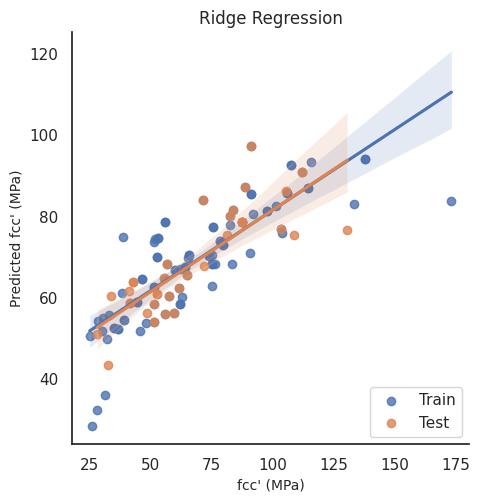

In [94]:
sns.set_theme(style="white")
drawThePlot(model, y_train, train_pred, y_test, pred, "Ridge Regression")

In [95]:
#Evaluation of the model

k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,284.475606
1,RMSE,16.866405
2,MAE,12.368919
3,MAPE,20.947786
4,r2,0.559495
5,adj_r2,0.436153


##Lasso Regression

In [100]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
pred = model.predict(X_test)
 
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 59.69551102471582
Test score of trained model: 56.23737342262719


In [101]:
print('Linear Model Coefficient (m): ', model.coef_)
print('Linear Model Coefficient (b): ', model.intercept_)

Linear Model Coefficient (m):  [17.84386208  0.53078622  0.          0.         11.50735168  0.
  0.        ]
Linear Model Coefficient (b):  69.26028651177873


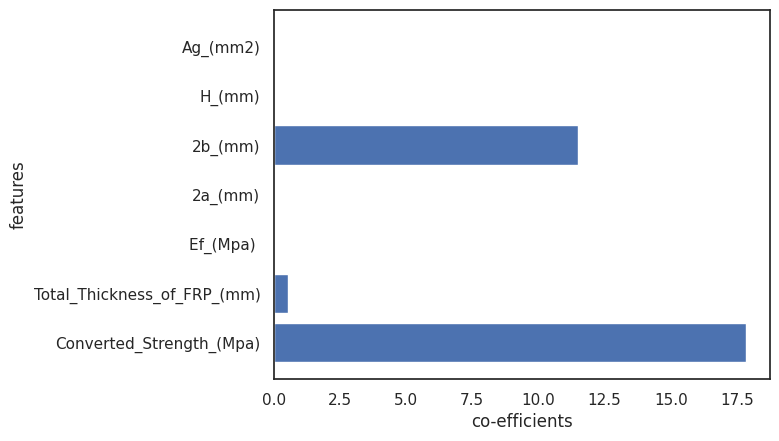

In [112]:
cols = ['Converted_Strength_(Mpa)', 'Total_Thickness_of_FRP_(mm)', 'Ef_(Mpa) ',
       '2a_(mm)', '2b_(mm)', 'H_(mm)', 'Ag_(mm2)']
plt.barh(cols, model.coef_)
plt.xlabel('co-efficients')
plt.ylabel('features')
plt.show()

It shows ef, 2a, H, Ag ae not playing any role

/usr/local/lib/python3.9/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


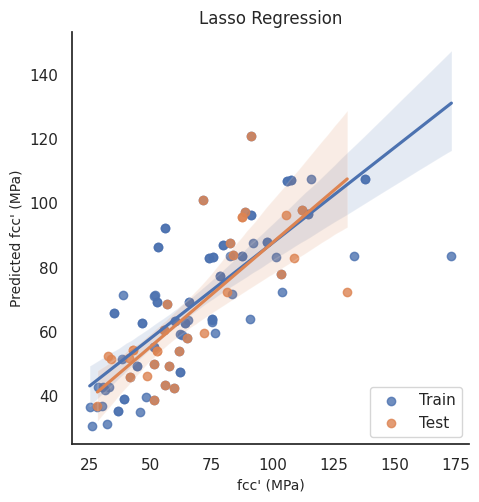

In [113]:
sns.set_theme(style="white")
drawThePlot(model, y_train, train_pred, y_test, pred, "Lasso Regression")

In [114]:
#Evaluation of the model

k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,282.616300
1,RMSE,16.811196
2,MAE,12.592136
3,MAPE,19.285283
4,r2,0.562374
5,adj_r2,0.439838


##Elastic net

In [115]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)

model.fit(X_train, y_train)
pred = model.predict(X_test)
train_pred = model.predict(X_train)
 
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 76.33350611683886
Test score of trained model: 70.90635409435137


In [116]:
print('Linear Model Coefficient (m): ', model.coef_)
print('Linear Model Coefficient (b): ', model.intercept_)

Linear Model Coefficient (m):  [ 12.62989757   7.93671481  -9.95344064 -24.07809968  16.2562577
   7.49607209  -2.67073993]
Linear Model Coefficient (b):  69.26028651177872


/usr/local/lib/python3.9/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


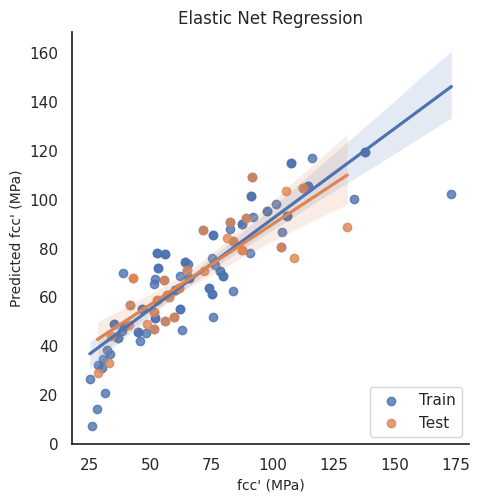

In [117]:
sns.set_theme(style="white")
drawThePlot(model, y_train, train_pred, y_test, pred, "Elastic Net Regression")

In [118]:
#Evaluation of the model

k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,187.884942
1,RMSE,13.707113
2,MAE,9.530383
3,MAPE,14.451532
4,r2,0.709064
5,adj_r2,0.627601


##Polynomial Regression

In [119]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=3)

In [120]:
X_columns = poly_regressor.fit_transform(X_train)

In [121]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_columns, y_train)
train_pred = model.predict(poly_regressor.fit_transform(X_train))
pred = model.predict(poly_regressor.fit_transform(X_test))

/usr/local/lib/python3.9/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


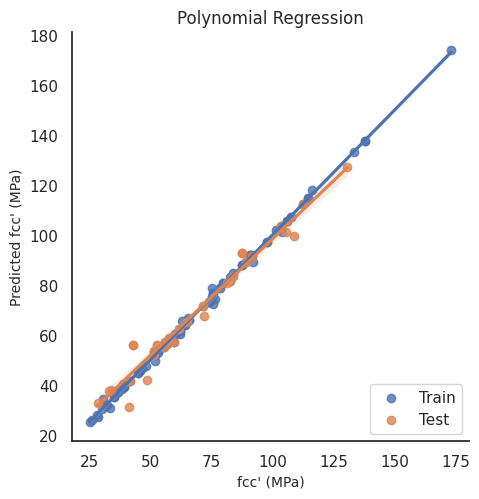

In [122]:
sns.set_theme(style="white")
drawThePlot(model, y_train, train_pred, y_test, pred, "Polynomial Regression")

In [124]:
#Evaluation of the model

k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,24.108431
1,RMSE,4.910034
2,MAE,3.225572
3,MAPE,6.274014
4,r2,0.962669
5,adj_r2,0.952216


##SGD Regressor

In [125]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
model.fit(X_train, y_train)
pred = model.predict(X_test)
train_pred = model.predict(X_train) 
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 71.14910393513797
Test score of trained model: 67.24701560505247


In [126]:
print('Linear Model Coefficient (m): ', model.coef_)
print('Linear Model Coefficient (b): ', model.intercept_)

Linear Model Coefficient (m):  [13.73006828  4.11731793 -4.96933408 -9.46982405 10.3841123  -4.554441
  3.95276936]
Linear Model Coefficient (b):  [68.28075562]


/usr/local/lib/python3.9/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


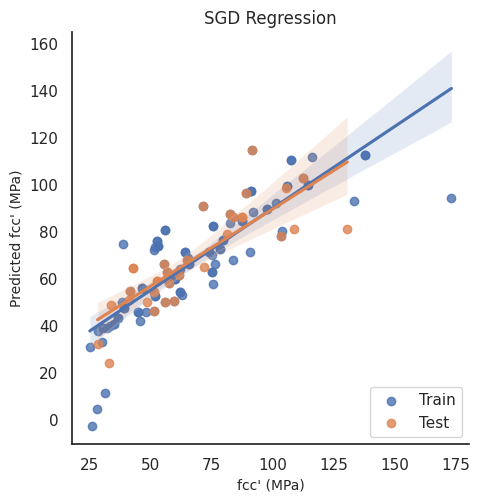

In [127]:
sns.set_theme(style="white")
drawThePlot(model, y_train, train_pred, y_test, pred, "SGD Regression")

In [128]:
#Evaluation of the model

k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,211.516720
1,RMSE,14.543614
2,MAE,10.230626
3,MAPE,15.977059
4,r2,0.672470
5,adj_r2,0.580762


##Random Forest Regressor

In [129]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, y_train)
pred = model.predict(X_test)
train_pred = model.predict(X_train)
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 98.91815836003005
Test score of trained model: 96.43324868529659


/usr/local/lib/python3.9/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


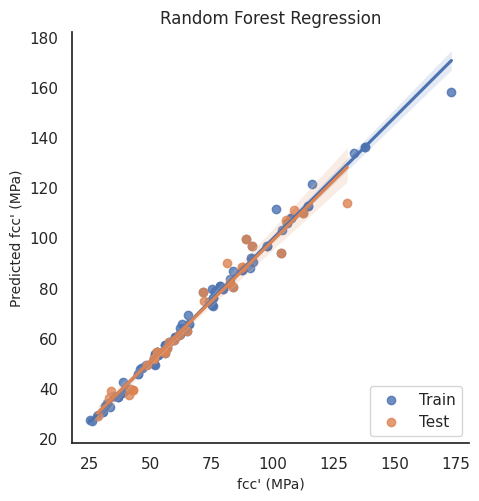

In [130]:
sns.set_theme(style="white")
drawThePlot(model, y_train, train_pred, y_test, pred, "Random Forest Regression")

In [131]:
#Evaluation of the model

k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,23.033856
1,RMSE,4.799360
2,MAE,3.224513
3,MAPE,4.686583
4,r2,0.964332
5,adj_r2,0.954346


##Support Vector Machine

In [133]:
from sklearn.svm import SVR

model = SVR(kernel='rbf', C=1000000, epsilon=0.001)
model.fit(X_train, y_train)
pred = model.predict(X_test)
train_pred = model.predict(X_train)
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 99.99121346690046
Test score of trained model: 91.8322944565444


/usr/local/lib/python3.9/dist-packages/seaborn/regression.py:582: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


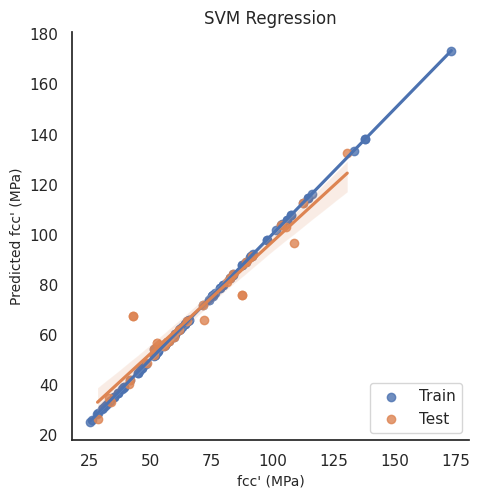

In [134]:
sns.set_theme(style="white")
drawThePlot(model, y_train, train_pred, y_test, pred, "SVM Regression")

In [136]:
#Evaluation of the model

k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,52.746530
1,RMSE,7.262681
2,MAE,3.441910
3,MAPE,6.257583
4,r2,0.918323
5,adj_r2,0.895453
